In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
train_data = pd.read_csv(
    "./Dataset/Training and Testing Sets/UNSW_NB15_training-set.csv")


test_data = pd.read_csv(
    "./Dataset/Training and Testing Sets/UNSW_NB15_testing-set.csv")

In [8]:
train_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [9]:
train_data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [10]:
feature_list = pd.read_csv("./Dataset/NUSW-NB15_features.csv")

feature_list

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


# Basic info about the datasets


In [11]:
# train_data.describe().transpose()

In [12]:
train_data.describe(include='object')

,proto,service,state,attack_cat
count,175341,175341,175341,175341
unique,133,13,9,10
top,tcp,-,INT,Normal
freq,79946,94168,82275,56000


In [13]:
print("Training Data Info:")
print(train_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-n

In [14]:
# test_data.describe().transpose()

In [15]:
print("\nTesting Data Info:")
print(test_data.info())


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  si

# Print dimensions of the datasets


In [16]:
print("Training Data Dimensions (rows, columns):", train_data.shape)


print("Testing Data Dimensions (rows, columns):", test_data.shape)

Training Data Dimensions (rows, columns): (175341, 45)
Testing Data Dimensions (rows, columns): (82332, 45)


# Data Preprocessing for EDA


In [ ]:
train_data['state'] = train_data['state'].replace('-', 'others')
train_data['service'] = train_data['service'].replace('-', 'others')

In [ ]:
test_data['state'] = test_data['state'].replace('-', 'others')
test_data['service'] = test_data['service'].replace('-', 'others')

# Checking for Missing Data

We will check if there are any missing values in both the training and testing datasets.


In [31]:
print("Missing values in Training Data:")

print(train_data.isnull().sum())
# print(train_data.isna().sum())

Missing values in Training Data:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
i

# Checking for Redundant Data

Check for duplicate rows in the training and testing datasets


In [32]:
print("Duplicate rows in Training Data:", train_data.duplicated().sum())

Duplicate rows in Training Data: 0


In [33]:
train_data.dropna(inplace=True)

In [34]:
train_data.isna().sum().sum()

0

In [35]:
train_data.drop(['id'], axis=1)
# train_data.drop(['id'], axis=1, inplace=True)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,others,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,others,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,others,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,others,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,tcp,others,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


# Detect Outliers

We can look at the statistical summary of the data, and for each numerical column, we can check for unusually high or low values by identifying those beyond a certain range.


In [37]:
print("Statistical Summary of Training Data:")
display(train_data.describe().transpose())

Statistical Summary of Training Data:


,count,mean,std,min,25%,50%,75%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.000000,87671.000000,1.315060e+05,1.753410e+05
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09


# Class Imbalance

We will check for class imbalance using the 'label' column, which seems to represent whether a record is normal or an attack.

Additionally, we'll inspect the 'attack_cat' column to check the distribution of attack types.


Examine the Distribution of Attack Classes and Normal Class

We have a column that labels each record as either a "normal" instance or one of several 9 attack types (e.g., DoS, Probe, etc.).

We have examined the distribution of these categories above.


Class distribution in Training Data ('label' column):
        Count  Percentage (%)
label                        
1      119341       68.062233
0       56000       31.937767


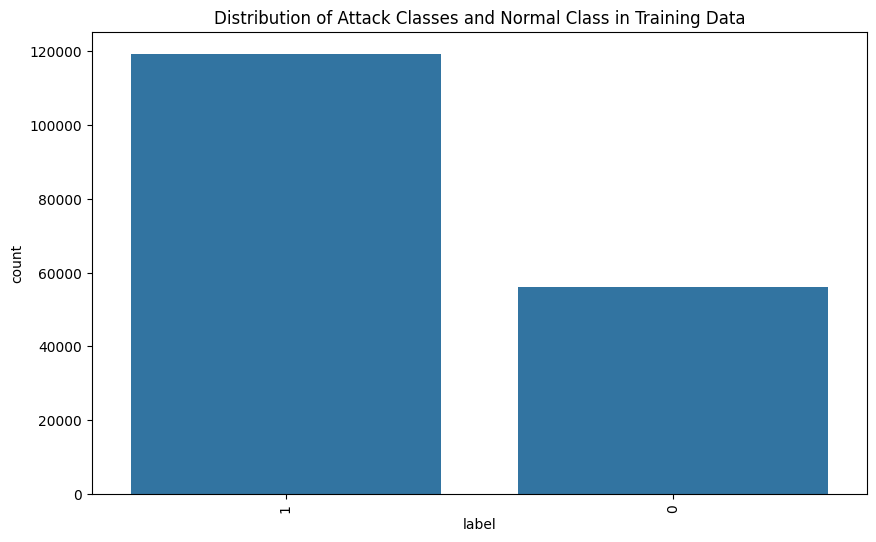

In [38]:
# Check class distribution in the training set
print("Class distribution in Training Data ('label' column):")
lebel_counts = train_data['label'].value_counts()
lebel_percentages = train_data['label'].value_counts(normalize=True) * 100

lebel_distribution = pd.DataFrame(
    {
        'Count': lebel_counts,
        'Percentage (%)': lebel_percentages
    }
)
print(lebel_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='label',
              order=train_data['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Classes and Normal Class in Training Data')
plt.show()

In [39]:
fig = px.pie(lebel_counts,
             values=lebel_counts.values,
             names=lebel_counts.index,
             title='Distribution of Label')
fig.show()

Check for Imbalances Between Different Attack Classes

If the label column contains both normal and attack classes, we will want to check how many samples are available for each specific attack class.

This can help identify if some attack classes are underrepresented or overrepresented.



Attack categories distribution in Training Data ('attack_cat' column):
                Count  Percentage (%)
attack_cat                           
Normal          56000       31.937767
Generic         40000       22.812691
Exploits        33393       19.044605
Fuzzers         18184       10.370649
DoS             12264        6.994371
Reconnaissance  10491        5.983198
Analysis         2000        1.140635
Backdoor         1746        0.995774
Shellcode        1133        0.646169
Worms             130        0.074141


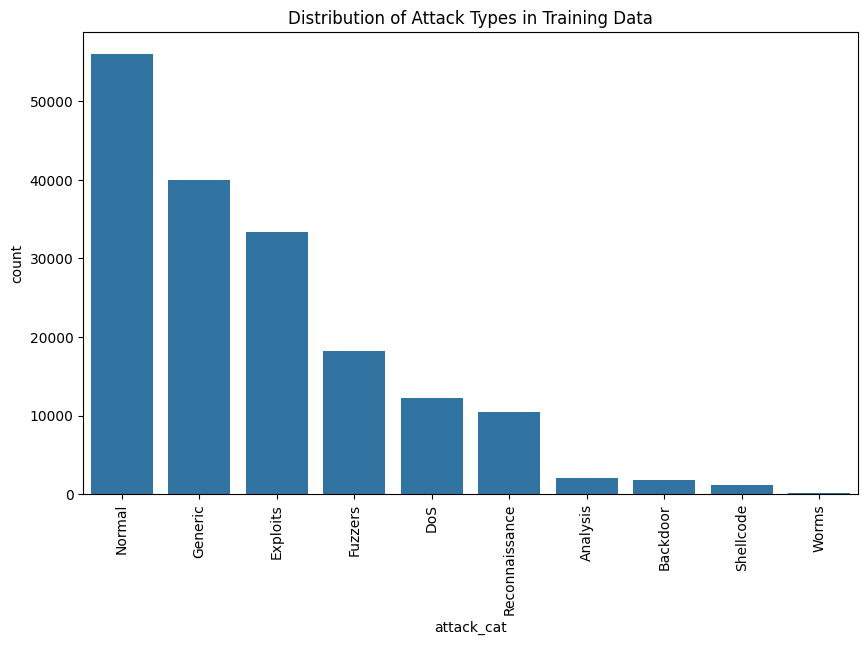

In [40]:
# Check attack categories distribution in the training set
print("\nAttack categories distribution in Training Data ('attack_cat' column):")
attack_counts = train_data['attack_cat'].value_counts()
attack_percentages = train_data['attack_cat'].value_counts(
    normalize=True) * 100

attack_distribution = pd.DataFrame(
    {
        'Count': attack_counts,
        'Percentage (%)': attack_percentages
    }
)
print(attack_distribution)


# Plot attack type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='attack_cat',
              order=train_data['attack_cat'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types in Training Data')
plt.show()

## Most Used Service By Attack Category


In [44]:
df_attacks_cat_services = train_data[(train_data['attack_cat'] != 'normal')].groupby(
    ['attack_cat', 'service']).size().reset_index(name='Count')

df_attacks_cat_services.reset_index()

,index,attack_cat,service,Count
0,0,Analysis,http,558
1,1,Analysis,others,1436
2,2,Analysis,smtp,6
3,3,Backdoor,ftp,5
4,4,Backdoor,http,83
...,...,...,...,...
59,59,Reconnaissance,smtp,5
60,60,Reconnaissance,snmp,60
61,61,Shellcode,others,1133
62,62,Worms,http,114


In [49]:
fig = make_subplots(rows=3,
                    cols=3,
                    subplot_titles=('Category: Analysis',
                                    'Category: Backdoor',
                                    'Category: DoS',
                                    'Category: Exploits',
                                    'Category: Fuzzers',
                                    'Category: Generic',
                                    'Category: Reconnaissance',
                                    'Category: Shellcode',
                                    'Category: Worms'
                                    )
                    )


# Create a list of attack categories to loop through
categories = ['Analysis',
              'Backdoor',
              'DoS',
              'Exploits',
              'Fuzzers',
              'Generic',
              'Reconnaissance',
              'Shellcode',
              'Worms'
              ]


# Define row and column positions for each plot
positions = [
    (1, 1),
    (1, 2),
    (1, 3),
    (2, 1),
    (2, 2),
    (2, 3),
    (3, 1),
    (3, 2),
    (3, 3)
]


# Loop through the categories and create a bar plot for each one
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category
    df_filtered = df_attacks_cat_services[df_attacks_cat_services['attack_cat'] == category]

    fig.add_trace(go.Bar(x=df_filtered['service'],
                         y=df_filtered['Count'],
                         name=category,
                         marker_color=px.colors.qualitative.Plotly[i]
                         ),
                  row=positions[i][0],
                  col=positions[i][1]
                  )


fig.update_layout(height=900,
                  width=900,
                  title_text="Service Counts by Attack Categories",
                  showlegend=False
                  )


fig.update_xaxes(tickangle=90)


fig.show()

## Top Protocols Used By Attack Category


In [ ]:
df_attacks_cat_proto = train_data[(train_data['attack_cat'] != 'normal')].groupby(
    ['attack_cat', 'proto']).size().reset_index(name='Count')

In [53]:
fig = make_subplots(rows=3,
                    cols=3,
                    subplot_titles=('Category: Analysis',
                                    'Category: Backdoor',
                                    'Category: DoS',
                                    'Category: Exploits',
                                    'Category: Fuzzers',
                                    'Category: Generic',
                                    'Category: Reconnaissance',
                                    'Category: Shellcode',
                                    'Category: Worms'
                                    )
                    )


categories = [
    'Analysis',
    'Backdoor',
    'DoS',
    'Exploits',
    'Fuzzers',
    'Generic',
    'Reconnaissance',
    'Shellcode',
    'Worms'
]


positions = [
    (1, 1),
    (1, 2),
    (1, 3),
    (2, 1),
    (2, 2),
    (2, 3),
    (3, 1),
    (3, 2),
    (3, 3)
]

# Loop through the categories and create a bar plot for each one (top 5 protocols)
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category and take the top 5 protocols
    df_filtered = df_attacks_cat_proto[df_attacks_cat_proto['attack_cat'] == category][:5]

    fig.add_trace(go.Bar(
        x=df_filtered['proto'],
        y=df_filtered['Count'],
        name=category,
        marker_color=px.colors.qualitative.Plotly[i]
    ),
        row=positions[i][0],
        col=positions[i][1]
    )


fig.update_layout(height=900,
                  width=900,
                  title_text="Top 5 Protocols by Attack Categories",
                  showlegend=False
                  )


fig.update_xaxes(tickangle=90)


fig.show()

# Summary


- The distribution of attacks types is not uniform, most of them are generic.
- The distributions of source bytes sent by attack type follow a similar trend, there are not noticeable differences between them.
- Most of the attacks use HTTP service (not considering 'other' category).
- 3pc and argus are protocols commonly used in distributed computing environments. Both are used by the majority of attacking types along with TCP and UDP


# Correlation matrix


Highly Correlated Features:
           Feature 1         Feature 2  Correlation
0             sbytes             spkts     0.963791
1             dbytes             dpkts     0.971907
2              sloss             spkts     0.971069
3              sloss            sbytes     0.996109
4              dloss             dpkts     0.978636
5              dloss            dbytes     0.996504
6               dwin              swin     0.990140
7             synack            tcprtt     0.949468
8             ackdat            tcprtt     0.941760
9   ct_src_dport_ltm        ct_dst_ltm     0.962052
10  ct_dst_sport_ltm  ct_src_dport_ltm     0.906793
11    ct_dst_src_ltm        ct_srv_src     0.967138
12        ct_ftp_cmd      is_ftp_login     1.000000
13        ct_srv_dst        ct_srv_src     0.980323
14        ct_srv_dst    ct_dst_src_ltm     0.972370
15   is_sm_ips_ports            sinpkt     0.941319


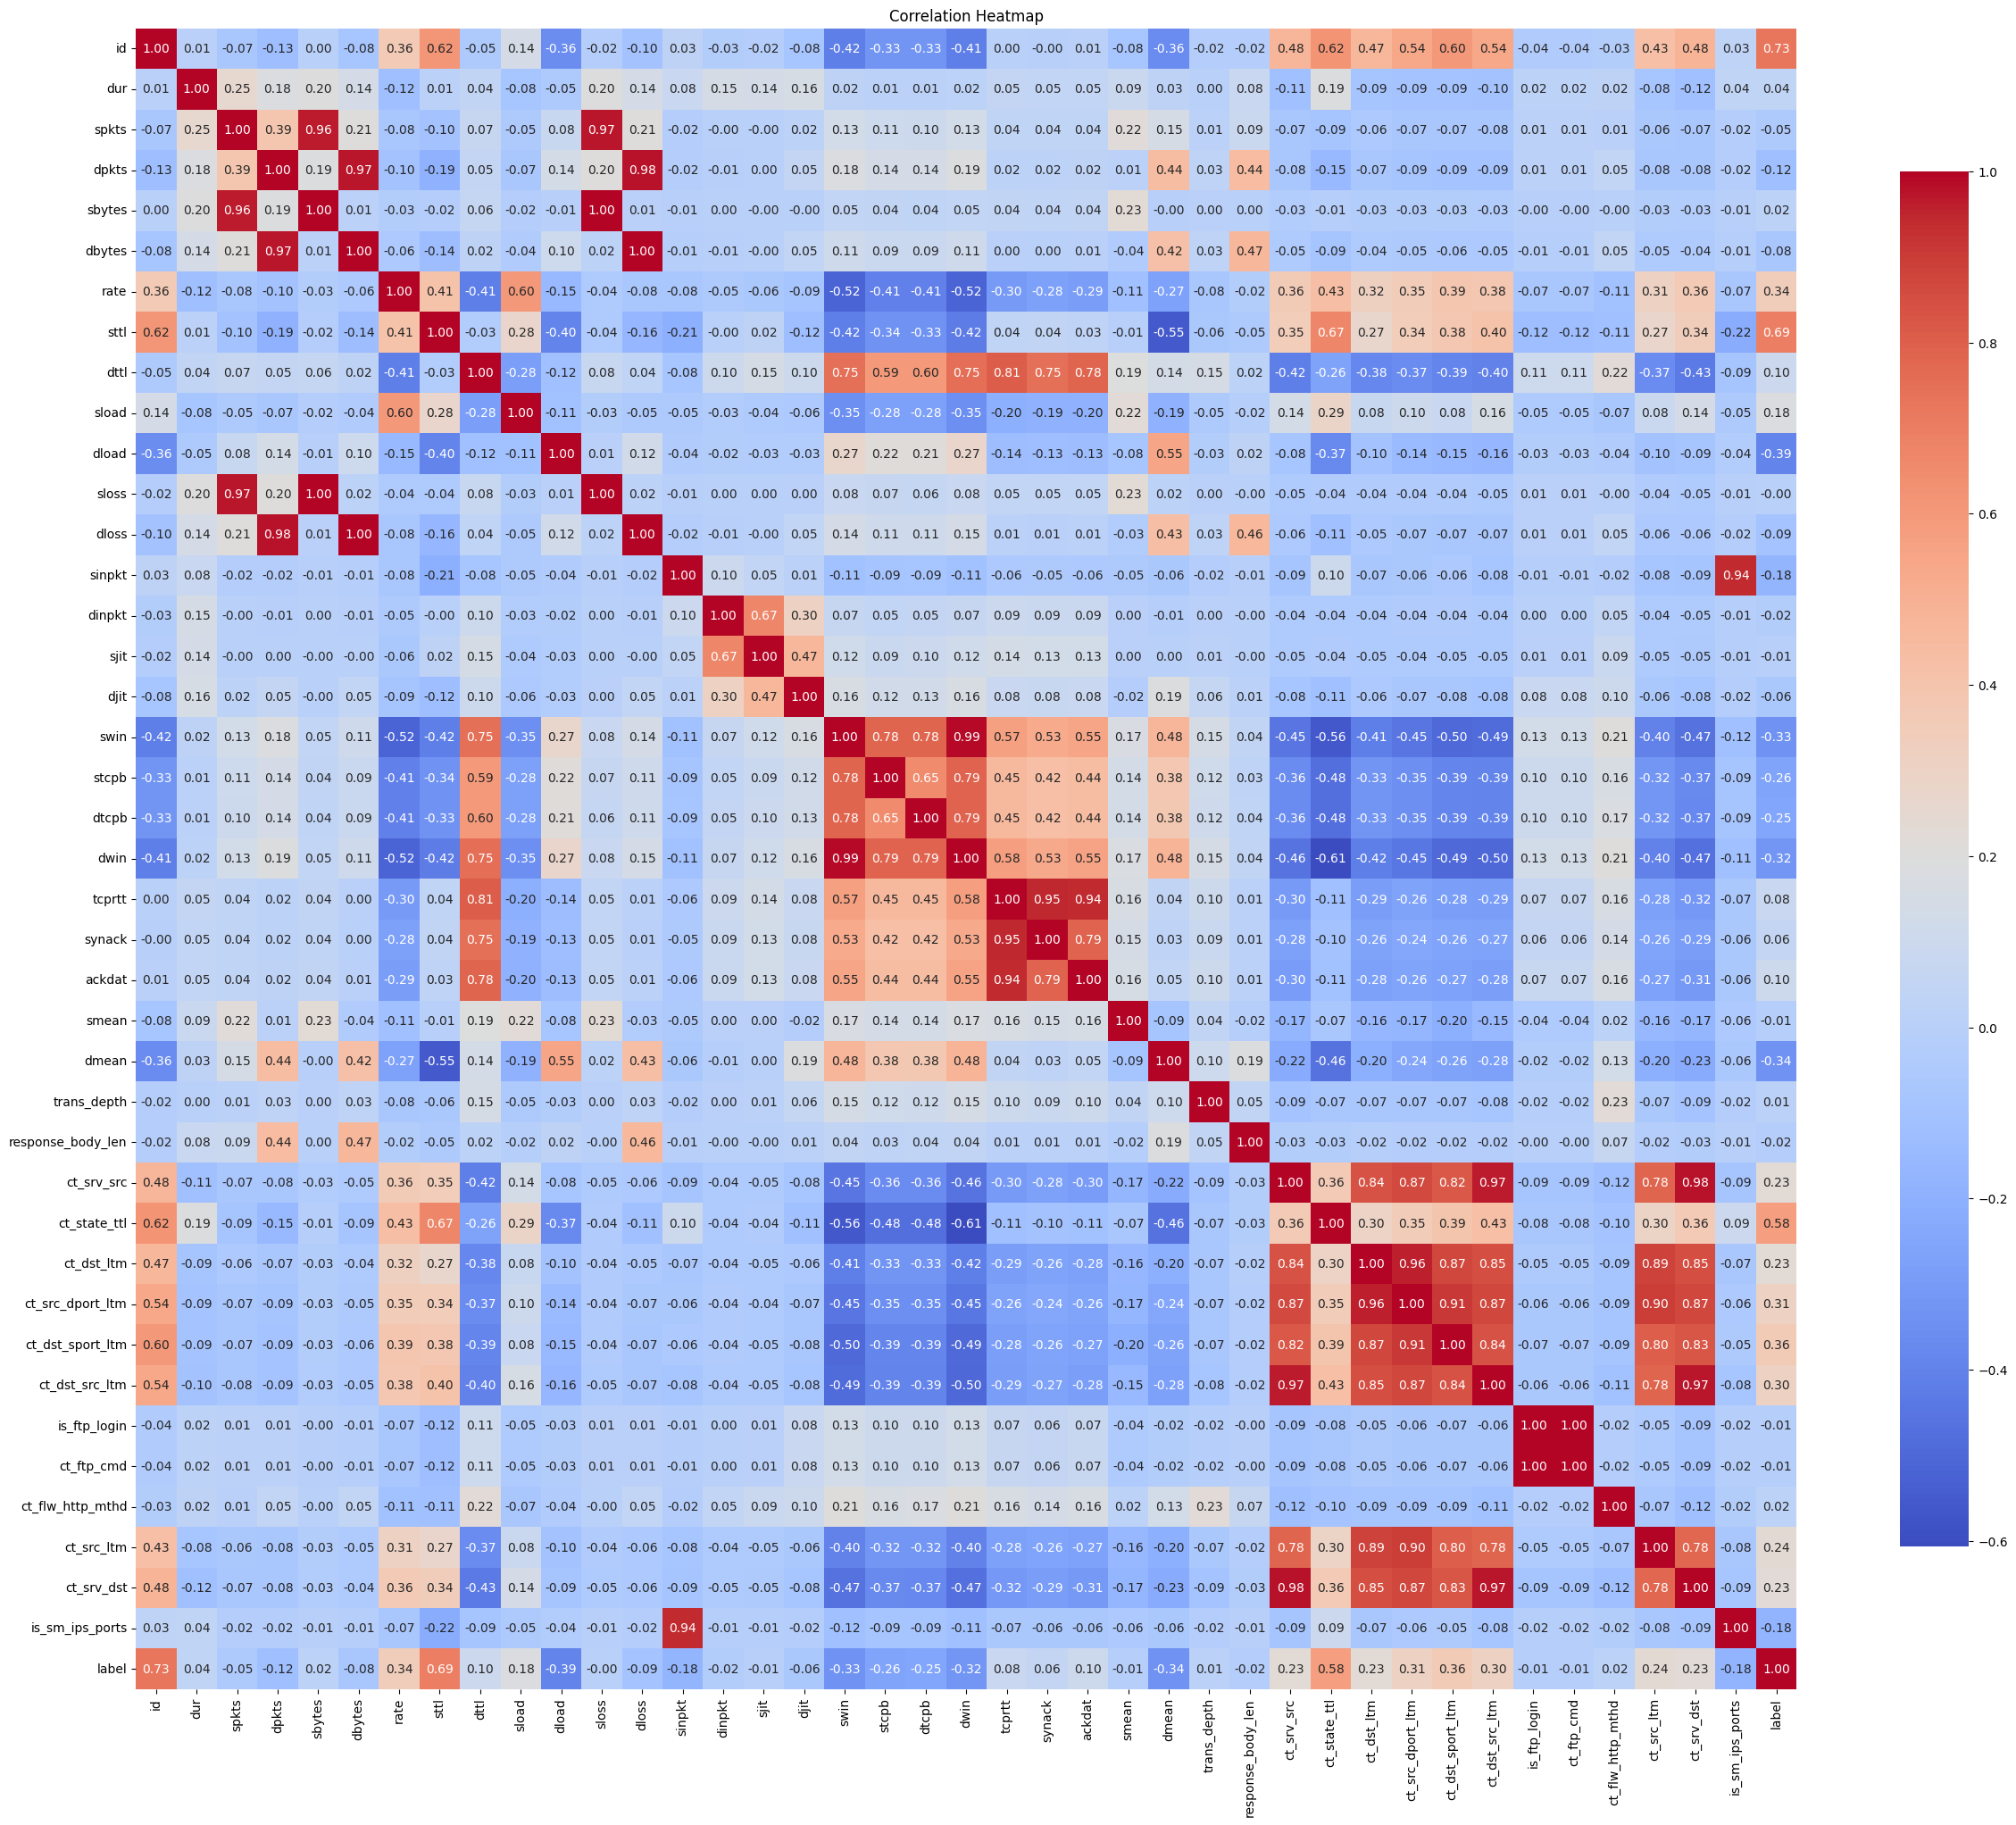

In [54]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]


# Step 2: Compute the correlation matrix
corr_matrix = numeric_data.corr()


# Step 3: Identify highly correlated features
threshold = 0.9
high_corr_pairs = []


# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append(
                (corr_matrix.columns[i],
                 corr_matrix.columns[j],
                 corr_matrix.iloc[i, j]
                 )
            )


# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs,
                            columns=['Feature 1',
                                     'Feature 2',
                                     'Correlation'
                                     ]
                            )


# Print highly correlated features
print("Highly Correlated Features:")
print(high_corr_df)


# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(30, 25))


sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            cbar_kws={"shrink": .8}
            )


plt.title('Correlation Heatmap')


plt.show()

# Preprocessing for the Model


1. Identifying Categorical Columns:


In [58]:
categorical_columns = train_data.select_dtypes(include=['object']).columns


categorical_columns

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

2. Encoding with One-Hot Encoding:


In [ ]:
train_data = pd.get_dummies(
    train_data, columns=['proto', 'service'], drop_first=True)

3. Encoding with Label Encoding:


In [ ]:
label_encoder = LabelEncoder()
train_data['state'] = label_encoder.fit_transform(train_data['state'])
train_data['attack_cat'] = label_encoder.fit_transform(
    train_data['attack_cat'])

## Feature Engineering


In [64]:
# Interaction between source and destination load
train_data['load_interaction'] = train_data['sload'] * train_data['dload']

In [65]:
# Total transaction bytes between source and destination
train_data['total_bytes'] = train_data['sbytes'] + train_data['dbytes']

In [66]:
# Packet flow ratio between source and destination
train_data['pkt_flow_ratio'] = train_data['spkts'] / (train_data['dpkts'] + 1)

In [67]:
# Bytes difference and ratio
train_data['bytes_diff'] = train_data['sbytes'] - train_data['dbytes']
train_data['bytes_ratio'] = train_data['sbytes'] / (train_data['dbytes'] + 1)

In [68]:
# TTL difference
train_data['ttl_diff'] = train_data['sttl'] - train_data['dttl']

In [69]:
# Jitter difference and ratio
train_data['jitter_diff'] = train_data['sjit'] - train_data['djit']
train_data['jitter_ratio'] = train_data['sjit'] / (train_data['djit'] + 1)

In [70]:
# Difference between synack and ackdat times
train_data['tcp_time_diff'] = train_data['synack'] - train_data['ackdat']

In [71]:
train_data.head()

,id,dur,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,service_ssl,load_interaction,total_bytes,pkt_flow_ratio,bytes_diff,bytes_ratio,ttl_diff,jitter_diff,jitter_ratio,tcp_time_diff
0,1,0.121478,2,6,4,258,172,74.087490,252,254,...,False,1.202854e+08,430,1.200000,86,1.491329,-2,18.346943,2.351997,0.000000
1,2,0.649902,2,14,38,734,42014,78.473372,62,252,...,False,4.227538e+09,42748,0.358974,-41280,0.017470,-190,-1326.351396,0.044231,0.000000
2,3,1.623129,2,8,16,364,13186,14.170161,62,252,...,False,9.579731e+07,13550,0.470588,-12822,0.027603,-190,5758.660630,1.504088,0.011019
3,4,1.681642,2,12,12,628,770,13.677108,62,252,...,False,9.203226e+06,1398,0.923077,-142,0.814527,-190,-4732.704497,0.051891,0.000000
4,5,0.449454,2,10,6,534,268,33.373826,254,252,...,False,3.413521e+07,802,1.428571,266,1.985130,2,2300.030634,20.682302,0.013913


In [ ]:
dataset1 = train_data.copy()
dataset2 = train_data.copy()

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that can help identify the most relevant features in a dataset, especially when dealing with high-dimensional data like intrusion detection datasets.

By projecting the data into a lower-dimensional space, PCA allows you to capture the most variance with fewer features, which can be useful for improving model performance and interpretability.


    Principal Component  Explained Variance  Cumulative Variance
0                     1        2.228642e-01             0.222864
1                     2        9.019519e-02             0.313059
2                     3        8.518520e-02             0.398245
3                     4        7.391482e-02             0.472159
4                     5        6.631392e-02             0.538473
5                     6        5.348081e-02             0.591954
6                     7        4.199049e-02             0.633945
7                     8        4.042029e-02             0.674365
8                     9        3.875819e-02             0.713123
9                    10        2.724825e-02             0.740371
10                   11        2.690271e-02             0.767274
11                   12        2.232101e-02             0.789595
12                   13        2.206248e-02             0.811658
13                   14        2.017412e-02             0.831832
14                   15  

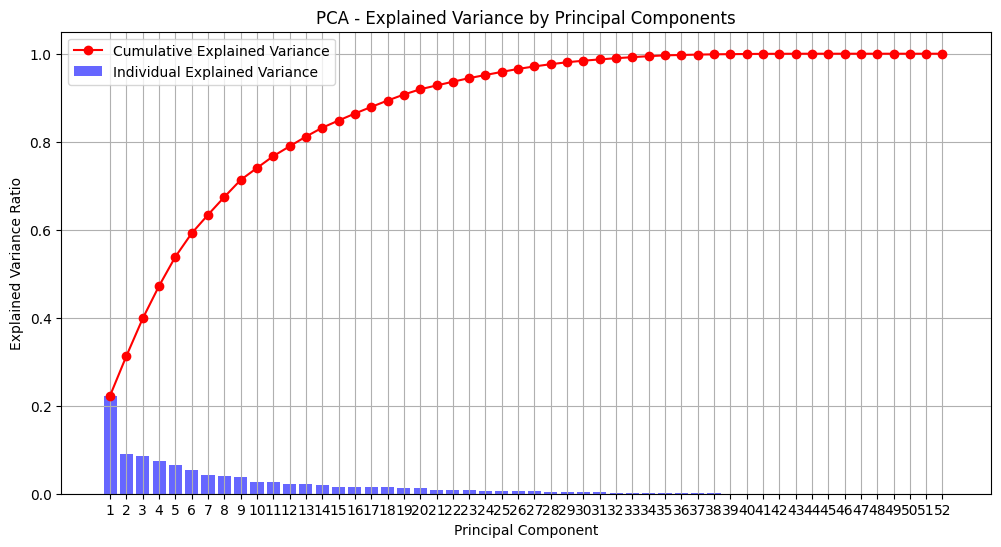

In [73]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Step 4: Analyze the results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Print explained variance
print(explained_variance_df)

# Step 5: Visualize explained variance
plt.figure(figsize=(12, 6))
plt.bar(explained_variance_df['Principal Component'], explained_variance_df['Explained Variance'],
        alpha=0.6, color='b', label='Individual Explained Variance')
plt.plot(explained_variance_df['Principal Component'], explained_variance_df['Cumulative Variance'],
         marker='o', color='r', label='Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_df) + 1))
plt.legend()
plt.grid()
plt.show()

## Choosing the Number of Components

From our cumulative variance, it appears that:

- The first 5 components capture approximately 55% of the variance.
- The first 10 components capture about 79% of the variance.
- To achieve over 90% variance, we'll need around 15-20 components.

Given this analysis, we can proceed with 15/20 components for PCA, as this allows for a good balance between dimensionality reduction and the retention of information.
